In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('seattle-weather.csv')

data.columns = ['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
weather_encoded = encoder.fit_transform(data[['weather']])

weather_encoded_df = pd.DataFrame(weather_encoded, columns=encoder.get_feature_names_out(['weather']))
data = pd.concat([data, weather_encoded_df], axis=1)

# Drop the original 'weather' column
data.drop(['weather', 'date'], axis=1, inplace=True)


In [5]:
data.duplicated().sum()

8

In [6]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [7]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
precipitation,0,0.0
temp_max,0,0.0
temp_min,0,0.0
wind,0,0.0
weather_fog,0,0.0
weather_rain,0,0.0
weather_snow,0,0.0
weather_sun,0,0.0


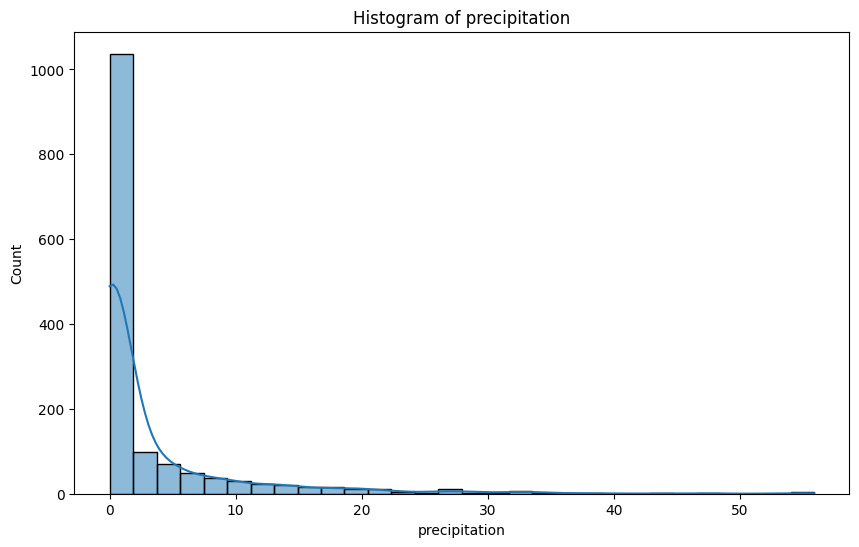

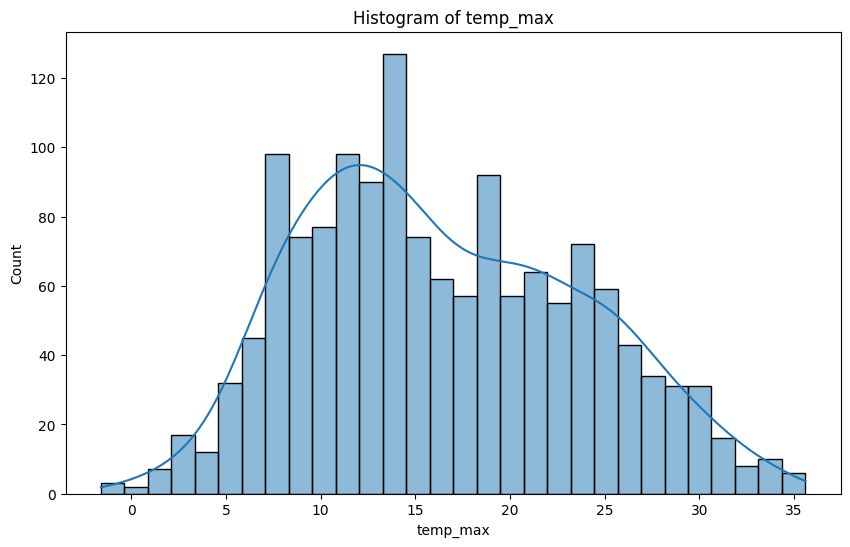

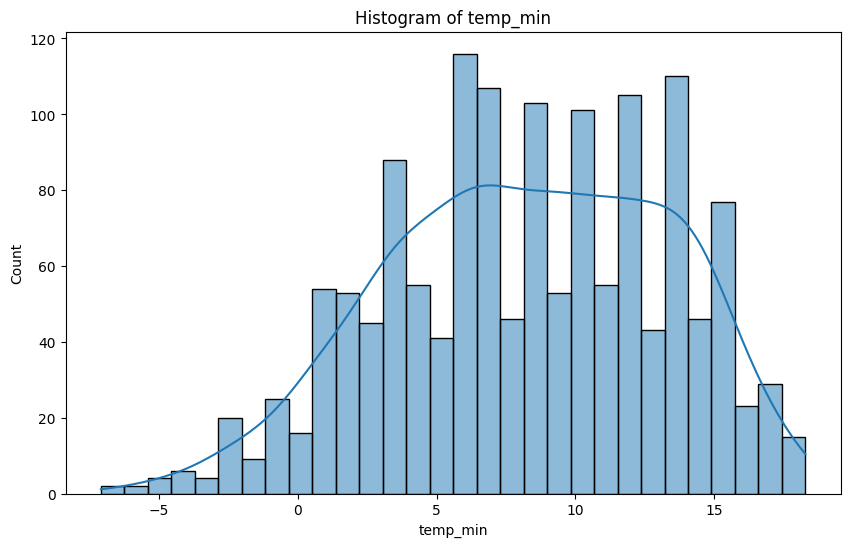

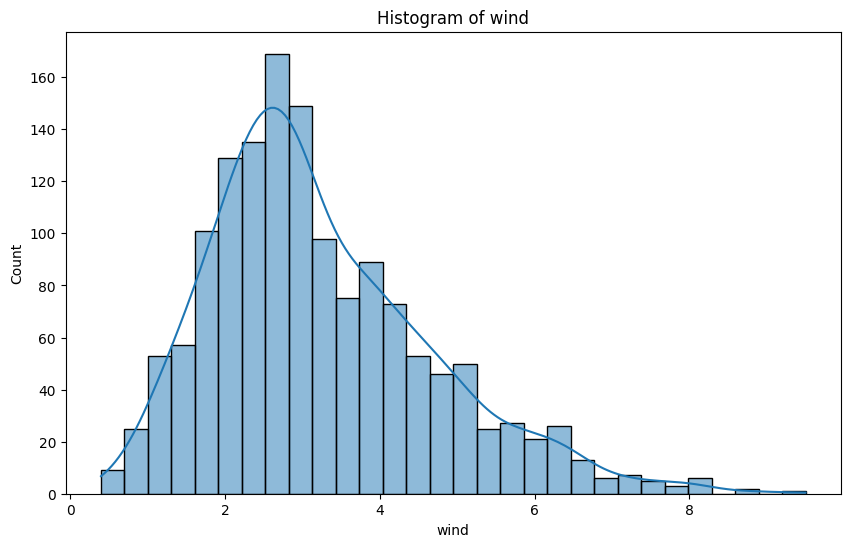

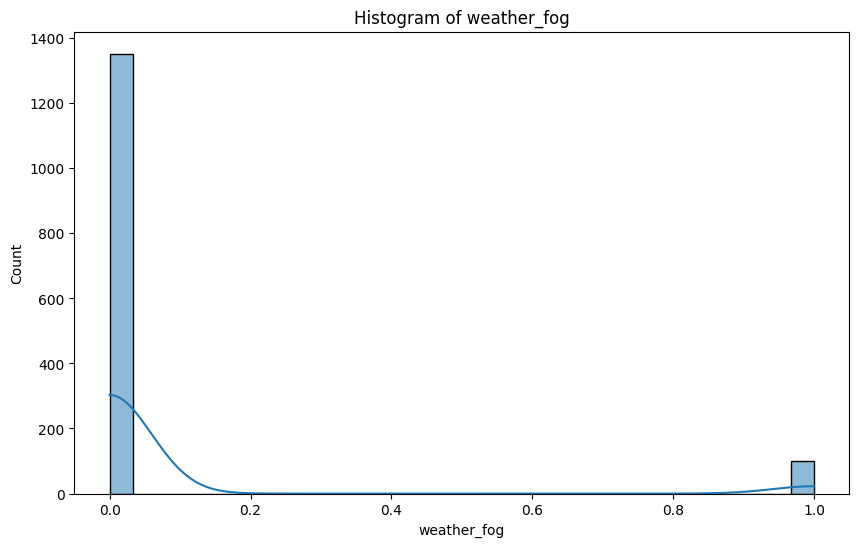

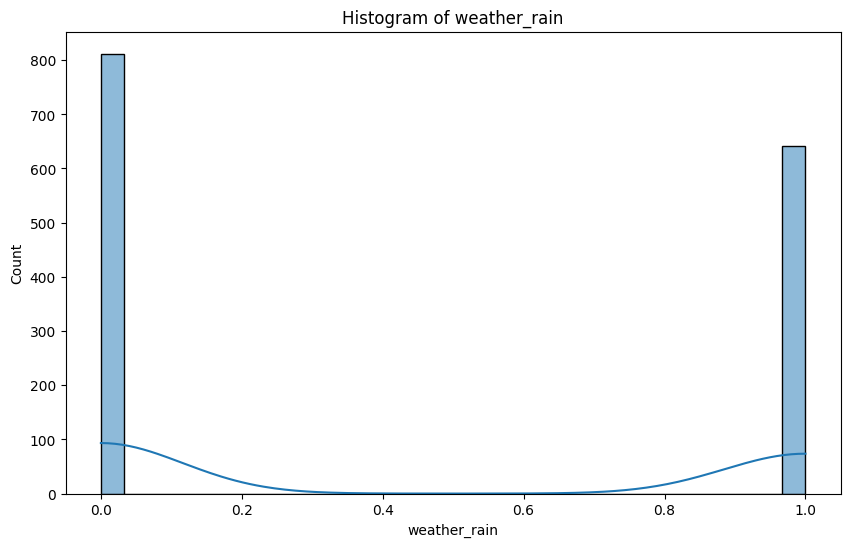

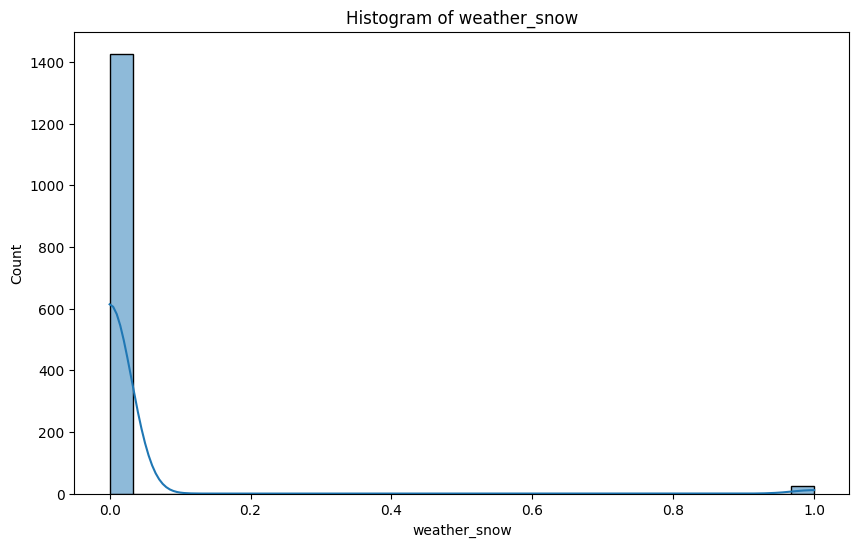

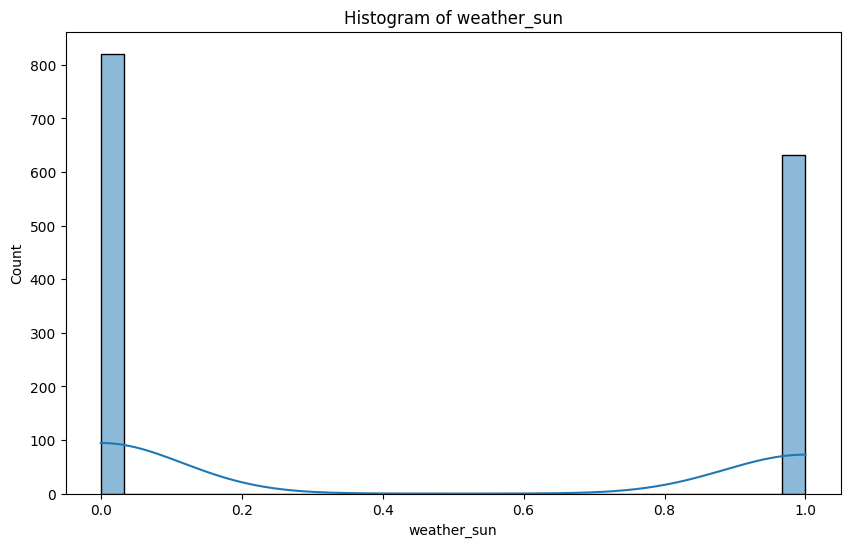

In [8]:
for col in data.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram of {col}')
    sns.histplot(data[col], bins=30, kde=True)
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['weather_sun'])  # Example: Predicting 'sun' as the target
y = data['weather_sun']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions, zero_division=0))

Random Forest Accuracy: 0.5429553264604811
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       158
         1.0       0.00      0.00      0.00       133

    accuracy                           0.54       291
   macro avg       0.27      0.50      0.35       291
weighted avg       0.29      0.54      0.38       291



In [11]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9621993127147767
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       158
         1.0       0.92      1.00      0.96       133

    accuracy                           0.96       291
   macro avg       0.96      0.97      0.96       291
weighted avg       0.97      0.96      0.96       291



In [12]:
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")

if rf_accuracy > lr_accuracy:
    print("Random Forest performed better.")
else:
    print("Logistic Regression performed better.")

Random Forest Accuracy: 0.5429553264604811
Logistic Regression Accuracy: 0.9621993127147767
Logistic Regression performed better.
